<a href="https://colab.research.google.com/github/cazani/Imersao_Python_Alura_2024/blob/main/Imers%C3%A3o_Python_Aulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 2 - Importação

In [37]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


In [40]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf # api que disponibiliza dados públicos de várias bolsas de valores do mundo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df_principal = pd.read_excel("/content/acoes_pura.xlsx", sheet_name="Principal")
df_principal

,Ativo,Data,Último (R$),Var. Dia (%),Var. Sem. (%),Var. Mês (%),Var. Ano (%),Var. 12M (%),Val. Mín,Val. Máx,Volume
0,USIM5,2024-01-26,9.50,5.20,11.76,2.26,2.26,15.97,9.18,9.56,"319,16 M"
1,CMIN3,2024-01-26,6.82,2.40,2.40,-12.11,-12.11,50.56,6.66,6.86,"32,65 M"
2,PETR3,2024-01-26,41.96,2.19,7.73,7.64,7.64,77.55,40.81,42.34,"436,69 M"
3,SUZB3,2024-01-26,52.91,2.04,2.14,-4.89,-4.89,18.85,51.89,53.17,"162,55 M"
4,CPFE3,2024-01-26,37.10,2.03,2.49,-3.66,-3.66,20.70,36.37,37.32,"73,42 M"
...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-9.47,-13.98,-13.98,-32.72,10.70,11.08,"38,19 M"
77,BHIA3,2024-01-26,8.70,-2.46,-6.95,-23.55,-23.55,-85.74,8.67,8.95,"27,54 M"
78,RENT3,2024-01-26,56.24,-3.63,-6.41,-11.57,-11.57,-2.77,56.04,58.90,"624,74 M"
79,CVCB3,2024-01-26,3.07,-4.36,-5.54,-12.29,-12.29,-36.83,3.05,3.23,"101,46 M"


In [ ]:
df_total_acoes = pd.read_excel("/content/acoes_pura.xlsx", sheet_name="TotalDeAcoes")
df_total_acoes

,Código,Qtde. Teórica
0,RRRP3,2.356656e+08
1,ALOS3,5.326166e+08
2,ALPA4,1.767340e+08
3,ABEV3,4.394246e+09
4,ARZZ3,6.230589e+07
...,...,...
84,VBBR3,1.114413e+09
85,WEGE3,1.481593e+09
86,YDUQ3,2.893479e+08
87,Quantidade Teórica Total,9.637210e+10


In [ ]:
df_ticker = pd.read_excel("/content/acoes_pura.xlsx", sheet_name="Ticker")
df_ticker

,Ticker,Nome
0,MGLU3,Magazine Luiza
1,HAPV3,Hapvida
2,PETR4,Petrobras
3,B3SA3,B3
4,USIM5,Usiminas
...,...,...
530,TKNO3,Tekno
531,COCE6,Coelce
532,MGEL3,Mangels
533,CTSA8,Santanense


In [ ]:
df_chatgpt = pd.read_excel("/content/acoes_pura.xlsx", sheet_name="ChatGpt")
df_chatgpt

,Nome da empresa,Segmento,Fundação,Idade (anos)
0,Usiminas,Siderurgia,1956,68
1,CSN Mineração,Mineração,1941,83
2,Petrobras,Petróleo e Gás,1953,71
3,Suzano,Papel e Celulose,1924,100
4,CPFL Energia,Energia,1912,112
...,...,...,...,...
76,Carrefour Brasil,Varejo,1975,49
77,Casas Bahia,Varejo,1952,72
78,Localiza,Aluguel de Carros,1973,51
79,CVC,Turismo,1972,52


In [ ]:
df_principal = df_principal[['Ativo', 'Data', 'Último (R$)', 'Var. Dia (%)']].copy()
df_principal

,Ativo,Data,Último (R$),Var. Dia (%)
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [ ]:
df_principal = df_principal.rename(columns={'Último (R$)':'valor_final', 'Var. Dia (%)':'var_dia_pct'}).copy()
df_principal

,Ativo,Data,valor_final,var_dia_pct
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


In [ ]:
df_principal['Var_pct'] = df_principal['var_dia_pct']/100
df_principal['Valor_inicial'] = df_principal['valor_final']/(df_principal['Var_pct']+1)
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854
...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954


In [ ]:
df_principal = df_principal.rename(columns={'var_dia':'valor_final'}).copy()

In [ ]:
df_principal = df_principal.merge(df_total_acoes, left_on='Ativo', right_on='Código', how='left')
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Código,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,USIM5,5.151174e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,CMIN3,1.110559e+09
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,PETR3,2.379878e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,SUZB3,6.834528e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,CPFE3,1.877325e+08
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,CRFB3,5.339906e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,BHIA3,9.484305e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,RENT3,8.532023e+08
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,CVCB3,5.255828e+08


In [ ]:
df_principal = df_principal.drop(columns=['Código'])
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08
...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08


In [ ]:
df_principal['Variacao_rs'] = (df_principal['valor_final']-df_principal['Valor_inicial'])*df_principal['Qtde. Teórica']
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391.00,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345.00,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655.00,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836.00,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538.00,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587.00,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047.00,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347.00,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771.00,-73557408.06


In [ ]:
df_principal['Qtde. Teórica'] = df_principal['Qtde. Teórica'].astype(int)
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [ ]:
df_principal = df_principal.rename(columns={'Qtde. Teórica':'Qtd_teorica'}).copy()
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [ ]:
df_principal['Resultado'] = df_principal['Variacao_rs'].apply(lambda x: 'subiu' if x > 0 else ('estavel' if x == 0 else 'desceu'))
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,subiu
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,subiu
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,subiu
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,subiu
...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,desceu
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,desceu
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,desceu
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,desceu


In [ ]:
df_principal = df_principal.merge(df_ticker, left_on='Ativo', right_on='Ticker', how='left')
df_principal = df_principal.drop(columns=['Ticker'])
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,subiu,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,subiu,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,subiu,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,subiu,CPFL Energia
...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,desceu,Carrefour Brasil
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,desceu,Casas Bahia
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,desceu,Localiza
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,desceu,CVC


In [ ]:
df_principal = df_principal.merge(df_chatgpt, left_on='Nome', right_on='Nome da empresa', how='left')
df_principal = df_principal.drop(columns=['Nome da empresa'])
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome,Segmento,Fundação,Idade (anos)
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,subiu,Usiminas,Siderurgia,1956,68
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,subiu,CSN Mineração,Mineração,1941,83
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras,Petróleo e Gás,1953,71
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras,Petróleo e Gás,1953,71
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,subiu,Suzano,Papel e Celulose,1924,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,desceu,Carrefour Brasil,Varejo,1975,49
83,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,desceu,Casas Bahia,Varejo,1952,72
84,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,desceu,Localiza,Aluguel de Carros,1973,51
85,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,desceu,CVC,Turismo,1972,52


In [ ]:
df_principal = df_principal.rename(columns={'Fundação':'Ano_de_fundacao'}).copy()
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome,Segmento,Ano_de_fundacao,Idade (anos)
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,subiu,Usiminas,Siderurgia,1956,68
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,subiu,CSN Mineração,Mineração,1941,83
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras,Petróleo e Gás,1953,71
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras,Petróleo e Gás,1953,71
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,subiu,Suzano,Papel e Celulose,1924,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,desceu,Carrefour Brasil,Varejo,1975,49
83,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,desceu,Casas Bahia,Varejo,1952,72
84,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,desceu,Localiza,Aluguel de Carros,1973,51
85,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,desceu,CVC,Turismo,1972,52


In [ ]:
df_principal = df_principal.rename(columns={'Idade (anos)':'idade'}).copy()
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome,Segmento,Ano_de_fundacao,idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,subiu,Usiminas,Siderurgia,1956,68
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,subiu,CSN Mineração,Mineração,1941,83
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras,Petróleo e Gás,1953,71
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras,Petróleo e Gás,1953,71
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,subiu,Suzano,Papel e Celulose,1924,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,desceu,Carrefour Brasil,Varejo,1975,49
83,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,desceu,Casas Bahia,Varejo,1952,72
84,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,desceu,Localiza,Aluguel de Carros,1973,51
85,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,desceu,CVC,Turismo,1972,52


In [ ]:
df_principal['Cat_idade'] = df_principal['idade'].apply(lambda x: 'Mais de 100' if x > 100 else ('Menos de 50' if x < 50 else 'Entre 50 e 100'))
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome,Segmento,Ano_de_fundacao,idade,Cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,subiu,Usiminas,Siderurgia,1956,68,Entre 50 e 100
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,subiu,CSN Mineração,Mineração,1941,83,Entre 50 e 100
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras,Petróleo e Gás,1953,71,Entre 50 e 100
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras,Petróleo e Gás,1953,71,Entre 50 e 100
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,subiu,Suzano,Papel e Celulose,1924,100,Entre 50 e 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,desceu,Carrefour Brasil,Varejo,1975,49,Menos de 50
83,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,desceu,Casas Bahia,Varejo,1952,72,Entre 50 e 100
84,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,desceu,Localiza,Aluguel de Carros,1973,51,Entre 50 e 100
85,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,desceu,CVC,Turismo,1972,52,Entre 50 e 100


In [ ]:
# Calculando o maior valor de "Variacao_rs"
maior = df_principal['Variacao_rs'].max()

# Calculando o menor valor de "Variacao_rs"
menor = df_principal['Variacao_rs'].min()

# Calculando a média dos valores de "Variacao_rs"
media = df_principal['Variacao_rs'].mean()

# Calculando a média dos valores de "Variacao_rs" para cada categoria de "Resultado"
media_subiu = df_principal[df_principal['Resultado'] == 'subiu']['Variacao_rs'].mean()
media_desceu = df_principal[df_principal['Resultado'] == 'desceu']['Variacao_rs'].mean()

# Imprimindo os resultados
print(f"Maior:\tR$ {maior:,.2f}")
print(f"Menor:\tR$ {menor:,.2f}")
print(f"Média:\tR$ {media:,.2f}")
print(f"Média de quem subiu:\tR$ {media_subiu:,.2f}")
print(f"Média de quem desceu:\tR$ {media_desceu:,.2f}")

Maior:	R$ 4,762,926,995.25
Menor:	R$ -1,807,432,634.46
Média:	R$ 218,008,898.33
Média de quem subiu:	R$ 538,720,638.36
Média de quem desceu:	R$ -186,265,310.46


In [ ]:
df_principal

,Ativo,Data,valor_final,var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Nome,Segmento,Ano_de_fundacao,idade,Cat_idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,subiu,Usiminas,Siderurgia,1956,68,Entre 50 e 100
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,subiu,CSN Mineração,Mineração,1941,83,Entre 50 e 100
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras,Petróleo e Gás,1953,71,Entre 50 e 100
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,subiu,Petrobras,Petróleo e Gás,1953,71,Entre 50 e 100
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,subiu,Suzano,Papel e Celulose,1924,100,Entre 50 e 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,desceu,Carrefour Brasil,Varejo,1975,49,Menos de 50
83,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,desceu,Casas Bahia,Varejo,1952,72,Entre 50 e 100
84,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,desceu,Localiza,Aluguel de Carros,1973,51,Entre 50 e 100
85,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,desceu,CVC,Turismo,1972,52,Entre 50 e 100


In [ ]:
df_principal_subiu = df_principal[df_principal['Resultado'] == 'subiu']
df_analise_segmento = df_principal_subiu.groupby('Segmento')['Variacao_rs'].sum().reset_index()
df_analise_segmento

,Segmento,Variacao_rs
0,Alimentos,407833683.09
1,Conglomerado,416092244.42
2,Construção Civil,55594318.99
3,Educação,72295838.99
4,Energia,821116399.61
5,Farmacêutico,202352473.74
6,Logística,233902674.79
7,Mineração,4940442965.55
8,Moda e Calçados,41021792.09
9,Papel e Celulose,722946282.71


In [ ]:
df_analise_saldo = df_principal.groupby('Resultado')['Variacao_rs'].sum().reset_index()
df_analise_saldo

,Resultado,Variacao_rs
0,desceu,-6891816486.99
1,estavel,0.00
2,subiu,25858590641.35


In [ ]:
fig = px.bar(df_analise_saldo, x='Resultado', y='Variacao_rs', text='Variacao_rs', title='Variação por Resultado em Reais')
fig.update_traces(texttemplate='R$ %{y:,.2f}')
fig.show()

In [ ]:
fig = px.pie(df_analise_segmento, values='Variacao_rs', names='Segmento', title='Variação das Ações por Segmento')
fig.show()

In [ ]:
df_analise_idade = df_principal.groupby('Cat_idade').agg({'Variacao_rs': 'sum', 'Nome': 'count'}).reset_index()
df_analise_idade.columns = ['Cat_idade', 'Variacao_rs', 'qtd_empresas']
df_analise_idade

,Cat_idade,Variacao_rs,qtd_empresas
0,Entre 50 e 100,14833735502.18,41
1,Mais de 100,989591984.60,7
2,Menos de 50,3143446667.58,39


In [33]:
fig = px.bar(df_analise_idade, x='Variacao_rs', y='Cat_idade', text='Variacao_rs', title='Variação por Idade da Empresa em Reais')
fig.update_traces(texttemplate='R$ %{x:,.2f}')
fig.show()

In [41]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500
...,...,...,...,...,...,...
2023-12-21,36.67,36.68,36.07,36.39,36.39,30511900
2023-12-22,36.50,36.80,36.37,36.74,36.74,31234700
2023-12-26,36.86,37.37,36.83,37.33,37.33,23466800


In [44]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Date,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500
...,...,...,...,...,...,...
2023-12-21,36.67,36.68,36.07,36.39,36.39,30511900
2023-12-22,36.50,36.80,36.37,36.74,36.74,31234700
2023-12-26,36.86,37.37,36.83,37.33,37.33,23466800


In [46]:
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500
...,...,...,...,...,...,...
2023-12-21,36.67,36.68,36.07,36.39,36.39,30511900
2023-12-22,36.50,36.80,36.37,36.74,36.74,31234700
2023-12-26,36.86,37.37,36.83,37.33,37.33,23466800


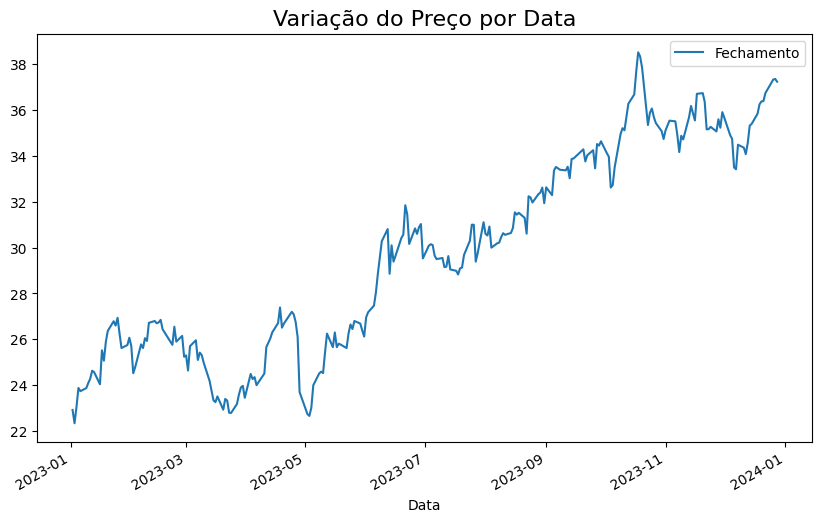

In [50]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do Preço por Data', fontsize=16)
plt.legend(['Fechamento'])

In [52]:
df = dados.head(60).copy()
#convertendo o índice em uma coluna de data
df['Data'] = df.index
#Convertendo as datas para o formato numérico de matplotlib
#Isso é necessário para que o Matplotlib possa plotar as datas coretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-02,23.54,23.81,22.80,22.92,17.71,78424700,19359.00
2023-01-03,22.94,23.10,22.13,22.34,17.26,96750300,19360.00
2023-01-04,21.96,23.59,21.83,23.05,17.81,129504000,19361.00
2023-01-05,23.34,24.04,23.15,23.88,18.45,73886000,19362.00
2023-01-06,23.94,24.32,23.55,23.74,18.34,51851500,19363.00
2023-01-09,23.50,24.00,23.25,23.87,18.44,46385200,19366.00
2023-01-10,23.95,24.11,23.37,24.09,18.61,52741100,19367.00
2023-01-11,24.15,24.62,24.05,24.28,18.76,53536500,19368.00
2023-01-12,24.29,24.65,24.11,24.63,19.03,58130000,19369.00


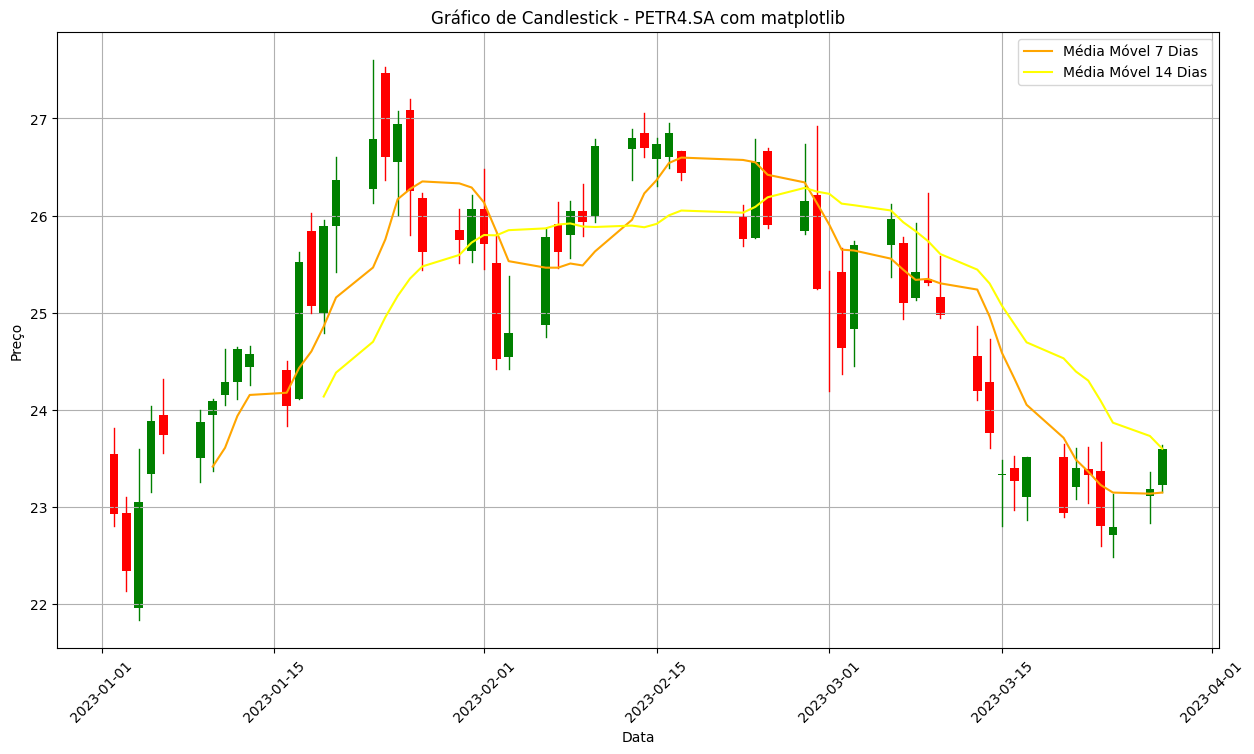

In [79]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['Data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [80]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [85]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


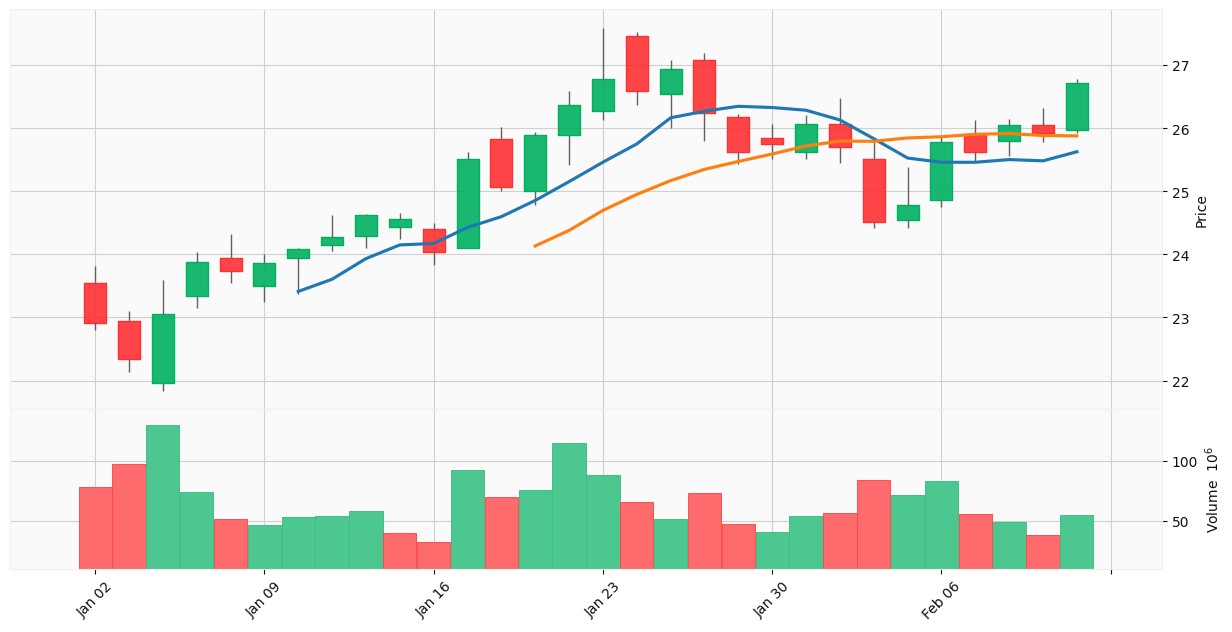

In [86]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')

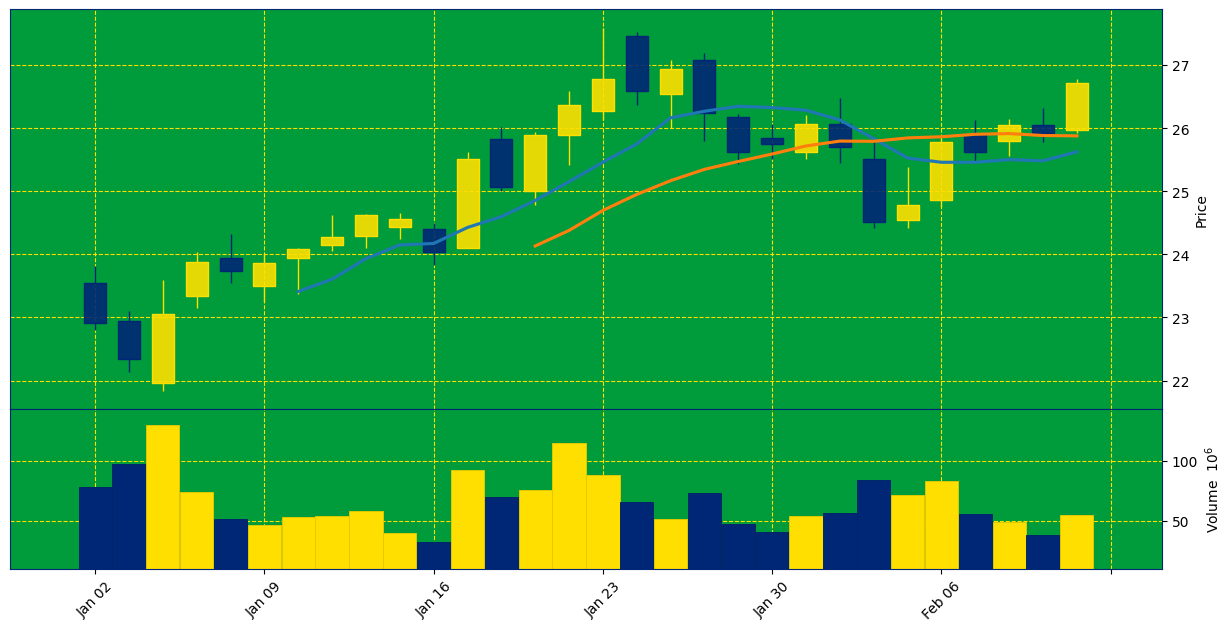

In [87]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='brasil') # Consulte a documentação para ver outros style

In [88]:
dados = yf.download('AAPL34.SA', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


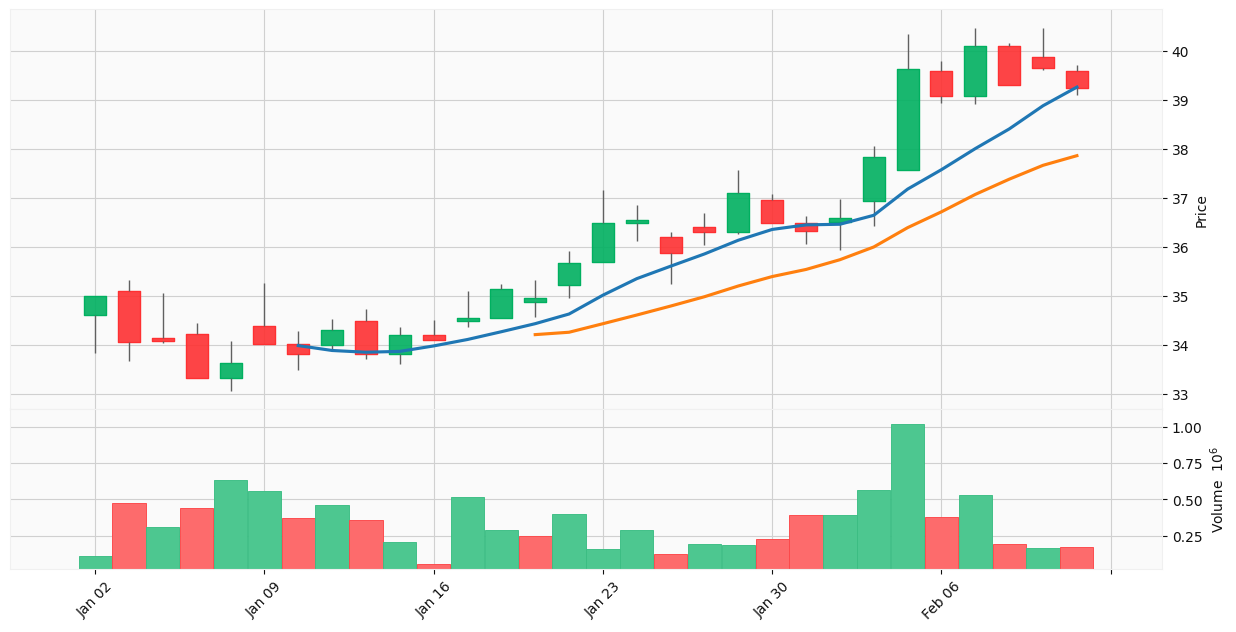

In [89]:
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')